In [1]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from github import Github

In [2]:
# Пустой датафрейм для дальнейшей работы
df = pd.DataFrame()

g = Github()

# 'Пользователь'/'Репозиторий'
repo = g.get_repo('awslabs/git-secrets')
for commit in repo.get_commits():

  loc_df = pd.DataFrame({'author':str(commit.author),
                     'commit_date':commit.commit.committer.date}, index=[0])
  df = pd.concat([df, loc_df], ignore_index=True)

df.head()

,author,commit_date
0,"NamedUser(login=""sparr"")",2023-06-20 23:28:33
1,"NamedUser(login=""creswick"")",2023-06-20 23:04:05
2,"NamedUser(login=""sparr"")",2023-06-20 21:42:52
3,"NamedUser(login=""creswick"")",2023-06-20 21:18:44
4,"NamedUser(login=""dannysauer"")",2022-10-21 17:25:58


In [3]:
print(f'Размер датафрейма: {df.shape[0]} строк и {df.shape[1]} столбцов')

Размер датафрейма: 117 строк и 2 столбцов


In [4]:
# Количество действий (за всё время), совершённых каждым пользователем
df_count = df.groupby('author').agg({'commit_date':'count'}).rename(columns={'commit_date':'commit_count'}).reset_index().sort_values('commit_count', ascending=False)
df_count.head()

,author,commit_count
22,"NamedUser(login=""mtdowling"")",49
21,"NamedUser(login=""michaelwittig"")",14
1,"NamedUser(login=""andreaswittig"")",6
26,None,5
7,"NamedUser(login=""daneah"")",5


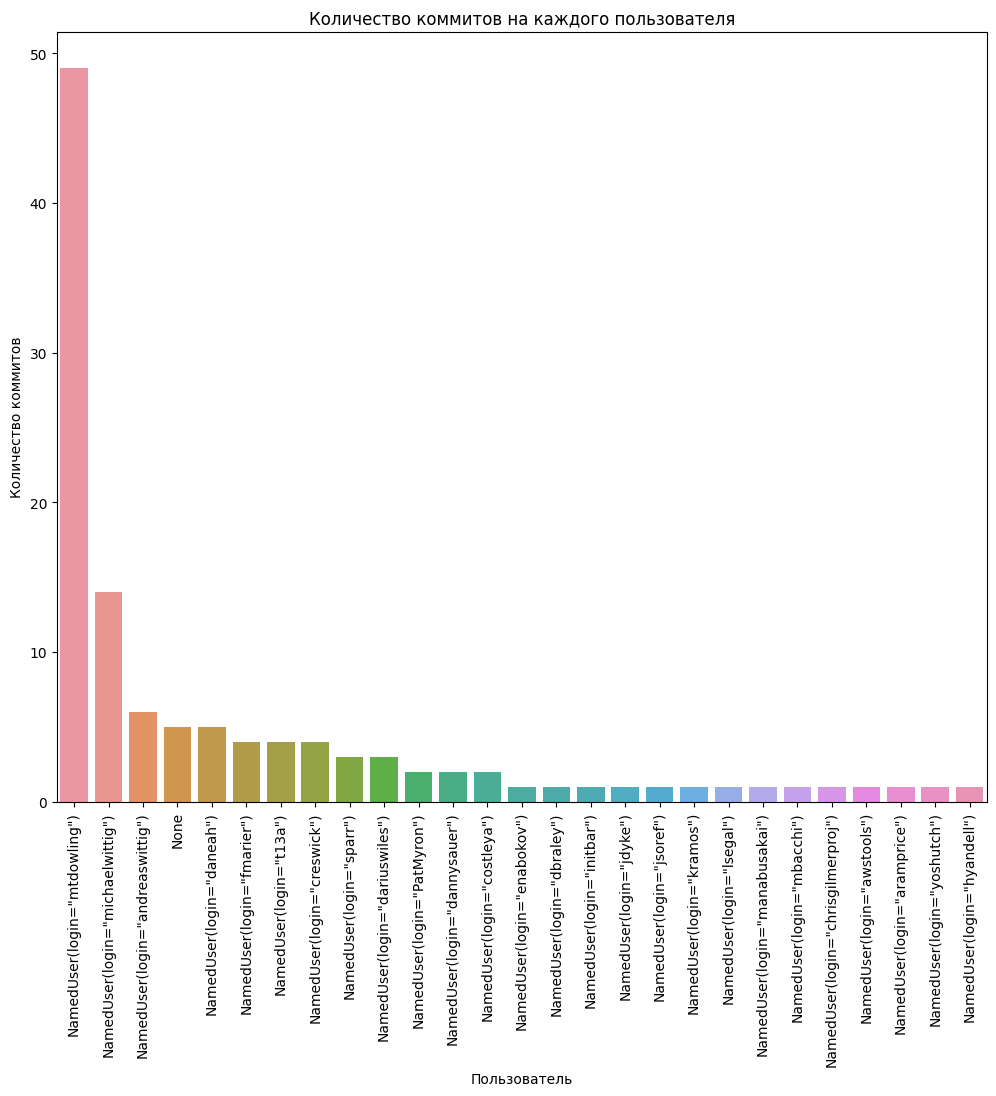

In [5]:
fig, ax = plt.subplots(sharey=True, figsize=(12,10))
sns.barplot(data=df_count, x='author', y='commit_count')
plt.title('Количество коммитов на каждого пользователя')
plt.xlabel('Пользователь')
plt.ylabel('Количество коммитов')
plt.xticks(rotation = 90)
plt.show()

In [6]:
# Количество действий, совершённых каждым пользователем на конкретную дату
df['date'] = df['commit_date'].dt.date
df_commit_count = df.groupby(['author', 'date']).agg({'commit_date':'count'}).rename(columns={'commit_date':'commit_count'}).reset_index()
df_commit_count.head()

,author,date,commit_count
0,"NamedUser(login=""PatMyron"")",2020-05-29,2
1,"NamedUser(login=""andreaswittig"")",2016-03-30,2
2,"NamedUser(login=""andreaswittig"")",2016-03-31,1
3,"NamedUser(login=""andreaswittig"")",2016-04-05,2
4,"NamedUser(login=""andreaswittig"")",2016-04-07,1


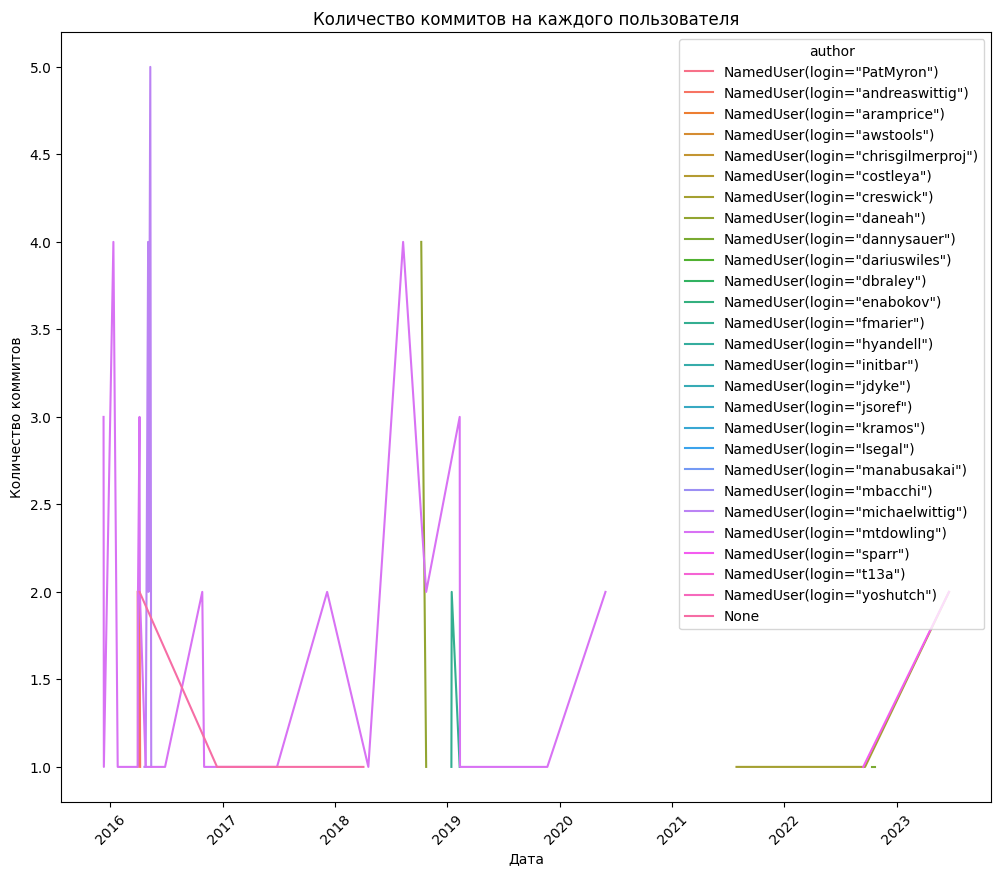

In [7]:
fig, ax = plt.subplots(sharey=True, figsize=(12,10))
sns.lineplot(data=df_commit_count, x='date', y='commit_count', hue='author')
plt.title('Количество коммитов на каждого пользователя')
plt.xlabel('Дата')
plt.ylabel('Количество коммитов')
plt.xticks(rotation = 45)
plt.show()

In [8]:
# Расчёт среднего времени между коммитами на каждого пользователя.
result_data = []

# Получение уникальных авторов
authors = df['author'].unique()

# Итерация по авторам
for author in authors:
    author_data = df[df['author'] == author]
    author_data = author_data.sort_values('date')
    author_data['delta'] = author_data['date'].diff().fillna(pd.Timedelta(seconds=0))
    average_delta = author_data['delta'].mean()

    # Добавление результатов в список
    result_data.append(pd.Series({'author': author, 'average_delta': average_delta}))

result_df = pd.concat(result_data, axis=1).T
result_df = result_df.reset_index(drop=True)

result_df.head(10)

,author,average_delta
0,"NamedUser(login=""sparr"")",93 days 00:00:00
1,"NamedUser(login=""creswick"")",172 days 18:00:00
2,"NamedUser(login=""dannysauer"")",4 days 00:00:00
3,"NamedUser(login=""jsoref"")",0 days 00:00:00
4,"NamedUser(login=""dariuswiles"")",0 days 00:00:00
5,"NamedUser(login=""mtdowling"")",33 days 07:20:48.979591836
6,"NamedUser(login=""PatMyron"")",0 days 00:00:00
7,"NamedUser(login=""jdyke"")",0 days 00:00:00
8,"NamedUser(login=""fmarier"")",6 days 18:00:00
9,"NamedUser(login=""awstools"")",0 days 00:00:00
